In [2]:
import numpy as np
import pandas as pd
from classes import *
import random

Growth Network Classes loaded


In [8]:
class Node_Gene:

    def __init__(self, node_id, layer, activation_function='ReLU'):
        """
    Node class represents the genetic encoding for a single neuron in a network.

    :param node_id: Unique identifier for the node
    :param layer: Type of node (e.g., 'input', 'output' or a number for hidden layers)
    :param activation_function: Activation function for the node (default is 'ReLU')
    """

        self.id  = node_id  # Unique identifier for the node
        self.type = layer # Type of node (e.g., 'input', 'output' or a number for hidden layers)
        self.act_func = activation_function #define code later

class Edge_Gene:
    def __init__(self, edge_id, IN, OUT, weight, enabled=True):
        """
        Edge class is the genetic encoding for a single connnection in a network.
        Each edge_gene defines a connection between two neurons with a weight.

        :param edge_id: Unique identifier for the gene
        :param IN: Input neuron (source node)
        :param OUT: Output neuron (target node)
        :param weight: Weight of the connection (can be positive or negative)
        :param enabled: Boolean indicating if the gene is enabled or disabled
        """
        self.id = edge_id  # Unique identifier for the gene
        self.IN = IN  # Input neuron
        self.OUT = OUT # Output neuron
        self.weight = weight  #weight
        self.enabled = enabled # Boolean indicating if the gene is enabled or disabled

    def show(self, display=False):
        """
        Print gene information. currently uses pandas
        """

        # Create a DataFrame to display gene information
        df = pd.DataFrame({
            'Gene ID': [self.id],
            'Input Neuron': [self.IN],
            'Output Neuron': [self.OUT],
            'Weight': [self.weight],
            'Enabled': [self.enabled]
        })
        # if display:
        #     display(df.T)
        return(df)

class Chromosome:
    def __init__(self, chromosome_id, edges=None, nodes=None, inputs=None, outputs=None, hidden=None):
        """
        Chromosome class represents a collection of genes
        Each chromosome can be thought of as a set of instructions for growing the neural network.

        :param chromosome_id: Unique identifier for the chromosome
        :param edges: List of edge genes in this chromosome
        :param nodes: List of node genes in this chromosome
        """

        if edges is None and nodes is None: #random intialization of the chromosome

            connectivity_ratio = 0.75 #ratio of connections to nodes

            nodes = []
            edges = []
            #Create iterables
            input_ids = range(inputs)
            hidden_ids = range(inputs, inputs + hidden)
            output_ids = range(inputs + hidden, inputs + hidden + outputs)

            #Create nodes per the number of inputs, outputs and hidden nodes
            for _ in range(inputs): nodes.append(Node_Gene(len(nodes), 'input'))
            for _ in range(hidden): nodes.append(Node_Gene(len(nodes), 1))
            for _ in range(outputs): nodes.append(Node_Gene(len(nodes), 'output'))

            # Create edges between input and hidden nodes
            for i in input_ids:
                connectable_hidden = random.sample(hidden_ids, random.randint(int(hidden*connectivity_ratio), hidden)) #choose a lower bound
                for h in connectable_hidden:
                    weight = np.random.uniform(-1, 1)
                    edges.append(Edge_Gene(len(edges), i, h, weight))

            # Create edges between hidden and output nodes
                for h in hidden_ids:
                    connectable_output = random.sample(output_ids, random.randint(int(outputs*connectivity_ratio), outputs)) #choose a lower bound
                    for o in connectable_output:
                        weight = np.random.uniform(-1, 1)
                        edges.append(Edge_Gene(len(edges), h, o, weight))

        self.id = chromosome_id  # Unique identifier for the chromosome
        self.nodes = nodes  # List to hold node_genes in this chromosome
        self.edges = edges  # List to hold edge_genes in this chromosome

    def add(self, edges):
        """
        Add a edge to the chromosome.

        :param edges: Gene object to be added
        """
        self.edges.extend(edges.tolist())  # extended the gene to the list of genes

    def show(self):
        output=pd.DataFrame()
        for edge in self.edges:
            df = edge.show()
            output = pd.concat([output, df], ignore_index=True)
        print(output) #jupyter will automatically display

    def create_adjacency_matrix(self):
        """
        Builds and returns the adjacency matrix from the gene connections.
        Nodes are auto-discovered from genes.
        """
        # Find unique neuron IDs
        neuron_ids = sorted(set(e.IN for e in self.edges) | set(e.OUT for e in self.edges))
        neuron_to_index = {nid: idx for idx, nid in enumerate(neuron_ids)}

        # Initialize matrix
        n = len(neuron_ids)
        matrix = np.zeros((n, n))

        # Fill matrix using genes
        for edge in self.edges:
            if edge.enabled:
                i = neuron_to_index[edge.IN]
                j = neuron_to_index[edge.OUT]
                matrix[i, j] = edge.weight  # directed from IN to OUT


        return matrix, neuron_to_index

class Network: #represents an induvidual in the population
    def __init__(self, network_id, chromosomes=None, inputs=None, outputs=None):
        """
        Network class represents a neural network built from a collection of chromosome.
        It can be used for forward propagation and other operations.

        :param network_id: Unique identifier for the network
        :param inputs: num input nodes
        :param outputs: num output nodes
        :param chromosomes: List of chromosome objects
        """
        #random intialization of the network
        if chromosomes is None:
            num_hidden_nodes = random.randint(1, 5)
            #run func to generate random chromosomes bases on num inputs and num outputs
            self.genotype = []
            self.genotype[0] = Chromosome(0, inputs=inputs, outputs=outputs, hidden=num_hidden_nodes) #embryonic enc choromosome (C0)

        self.id = network_id
        self.genotype = chromosomes  # Chromosome object

    def grow(self):
        print("Growing network")



In [4]:
C0 = Chromosome(0, inputs=3, outputs=2, hidden=4)
M, _ = C0.create_adjacency_matrix()






In [26]:
#define some nodes and edge
edge1 = Edge_Gene(1,0,1,0.5)
edge2 = Edge_Gene(2,1,2,0.8)
edge3 = Edge_Gene(3,2,3,0.2)
edge4 = Edge_Gene(4,3,4,0.1)
edge5 = Edge_Gene(5,4,5,0.6)
edge6 = Edge_Gene(6,5,6,0.4)
edge7 = Edge_Gene(7,6,7,0.9)



node0 = Node_Gene(0, 'input')
node1 = Node_Gene(1, 'input')
node2 = Node_Gene(2, 'output')
node3 = Node_Gene(3, 'output')
node4 = Node_Gene(4, 1)
node5 = Node_Gene(5, 1)
node6 = Node_Gene(6, 2)
node7 = Node_Gene(7, 2)


In [34]:
C1 = Chromosome(1, edges=[edge1, edge2, edge3, edge4, edge5, edge6, edge7], nodes=[node0, node1, node2, node3, node4, node5, node6, node7])
C1.show()

   Gene ID  Input Neuron  Output Neuron  Weight  Enabled
0        1             0              1     0.5     True
1        2             1              2     0.8     True
2        3             2              3     0.2     True
3        4             3              4     0.1     True
4        5             4              5     0.6     True
5        6             5              6     0.4     True
6        7             6              7     0.9     True


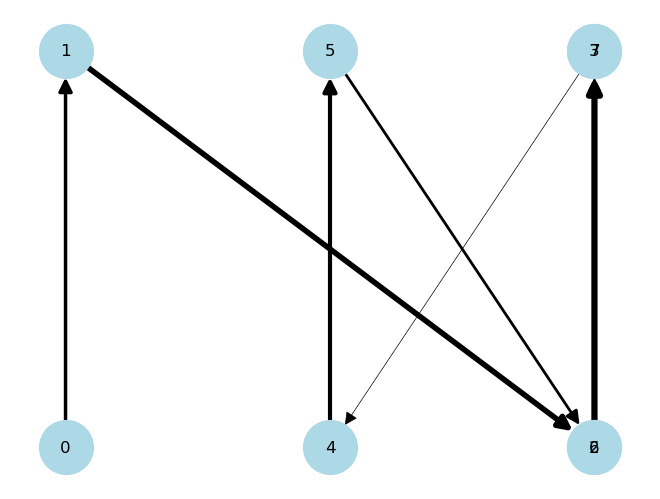

In [35]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def generate_layer_positions(nodes):

    layer_nodes = defaultdict(list)

    # Group nodes by their layer
    for node in nodes:
        if node.type == 'input':
            layer_nodes[0].append(node)
        elif node.type == 'output':
            layer_nodes['output'].append(node)
        else:
            layer_nodes[node.type].append(node)

    # Determine number of hidden layers and output layer x-position
    hidden_layers = sorted([k for k in layer_nodes.keys() if isinstance(k, int)])
    max_hidden_layer = max(hidden_layers) if hidden_layers else 0
    output_layer_x = max_hidden_layer + 1

    # Assign x-values
    layer_x = {}
    layer_x[0] = 0  # Input layer
    for i, layer in enumerate(hidden_layers):
        layer_x[layer] = i + 1
    layer_x['output'] = output_layer_x

    # Assign y-positions
    positions = {}
    for layer, nodes_in_layer in layer_nodes.items():
        x = layer_x[layer]
        num_nodes = len(nodes_in_layer)
        y_spacing = 1
        y_start = -((num_nodes - 1) / 2) * y_spacing
        for i, node in enumerate(nodes_in_layer):
            y = y_start + i * y_spacing
            positions[node.id] = (x, y)

    return positions

def plot_chromosome(chromosome):
    # Create adjacency matrix and neuron-to-index mapping
    adj_matrix, neuron_to_index = chromosome.create_adjacency_matrix()

    # Create a directed graph from the adjacency matrix
    gA = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph())

    # Generate positions for nodes
    layer_positions = generate_layer_positions(chromosome.nodes)

    # Extract edge weights
    edges = gA.edges()
    weights = [gA[u][v]['weight'] for u, v in edges]
    scaled_weights = [5 * abs(w) for w in weights]  # Scale edge widths

    # Draw the graph
    nx.draw(gA, pos=layer_positions, with_labels=True,
            node_color='lightblue', node_size=1500,
            arrowsize=20, width=scaled_weights)
    plt.show()

plot_chromosome(C1)